# World Happiness Report 

The World Happiness Report is a landmark survey of the state of global happiness. This report reviews the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness. The happiness scores and rankings use data from the Gallup World Poll. The scores are based on answers to the main life evaluation question asked in the poll.

The dataset that we have chosen is Happiness Dataset 2017, one of Kaggle’s dataset. This dataset gives the happiness rank and happiness score of 155 countries around the world based on factors including family, health, economy, generosity, trust in government, freedom, country, region and dystopia residual.

## 1.Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

## 2.Loading Dataset

In [2]:
df=pd.read_csv('happiness_score_dataset.csv')

In [3]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
df.shape

(158, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [6]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

We can see that the dataset does not contain null values.So it does not need Data Cleaning.

## 3.Feature Engineering

We will rename some of the columns.

In [7]:
df.columns=df.columns.str.lower().str.replace(' ','_')
df.columns=['country','region','happiness_rank','happiness_score','standard_error','economy','family','health','freedom','trust','generosity','dystopia_residual']

In [8]:
df.head()

,country,region,happiness_rank,happiness_score,standard_error,economy,family,health,freedom,trust,generosity,dystopia_residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [9]:
df.describe()

,happiness_rank,happiness_score,standard_error,economy,family,health,freedom,trust,generosity,dystopia_residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


##  4. Exploratory Data Analysis

We explore the correlation between all numeric variables.

In [10]:
df.corr()

,happiness_rank,happiness_score,standard_error,economy,family,health,freedom,trust,generosity,dystopia_residual
happiness_rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
happiness_score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
standard_error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
economy,-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
health,-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
trust,-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
dystopia_residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


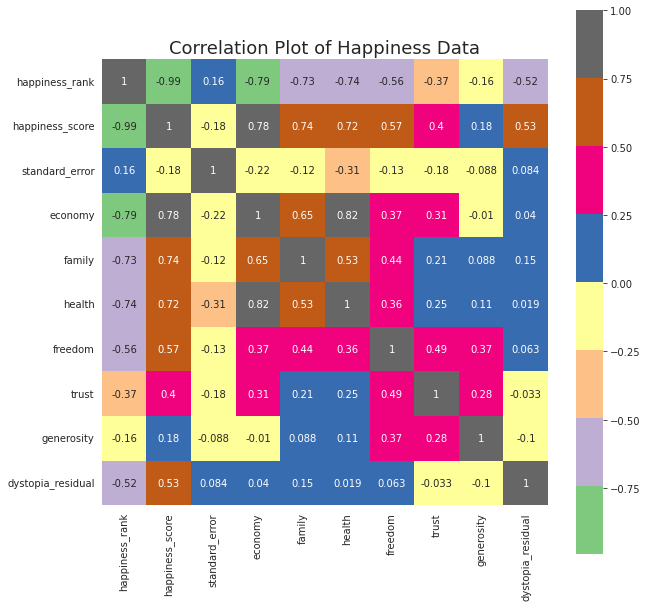

In [11]:
plt.figure(figsize=(10,10))
corr = df.corr()
with sns.axes_style('white'):
    ax = sns.heatmap(corr,square=True,annot=True,cmap='Accent')
plt.title('Correlation Plot of Happiness Data',fontsize=18)
plt.show()

According to corr plot,economy plays most significant role in contributing in happiness.Generosity has lowest impact on happiness score.Happiness rank and standard_error have reverse impact on happiness score

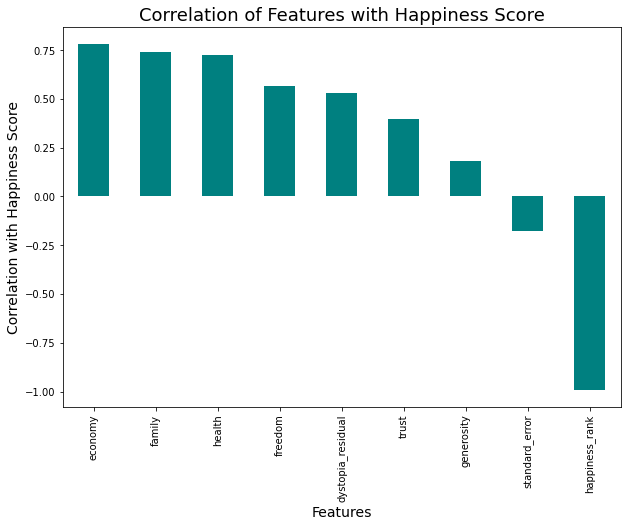

In [12]:
plt.figure(figsize=(10,7))
df.corr()['happiness_score'].sort_values(ascending=False).drop(['happiness_score']).plot(kind='bar',color='teal')
plt.xlabel('Features',fontsize =14)
plt.ylabel('Correlation with Happiness Score',fontsize=14)
plt.title('Correlation of Features with Happiness Score',fontsize=18)
plt.show()

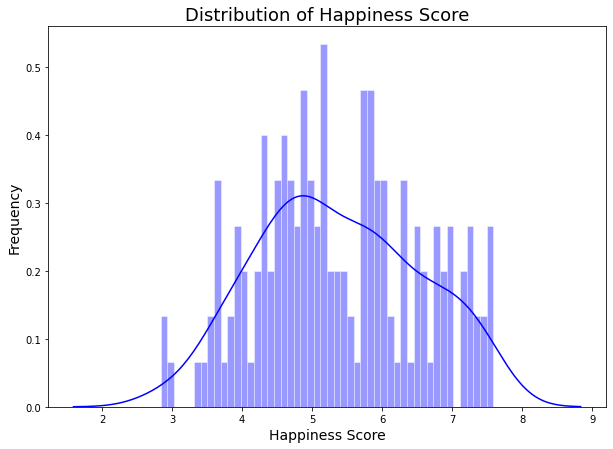

In [13]:
plt.figure(figsize=(10,7))
sns.distplot(df['happiness_score'],bins=50,kde=True,hist_kws=dict(edgecolor ='w'),color='b')
plt.xlabel('Happiness Score',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.title('Distribution of Happiness Score',fontsize=18)
plt.show()

We can observe that most of the happiness_score values are between 4 - 5.5

We will now check relationship between happiness score, economy,family,health and freedom.

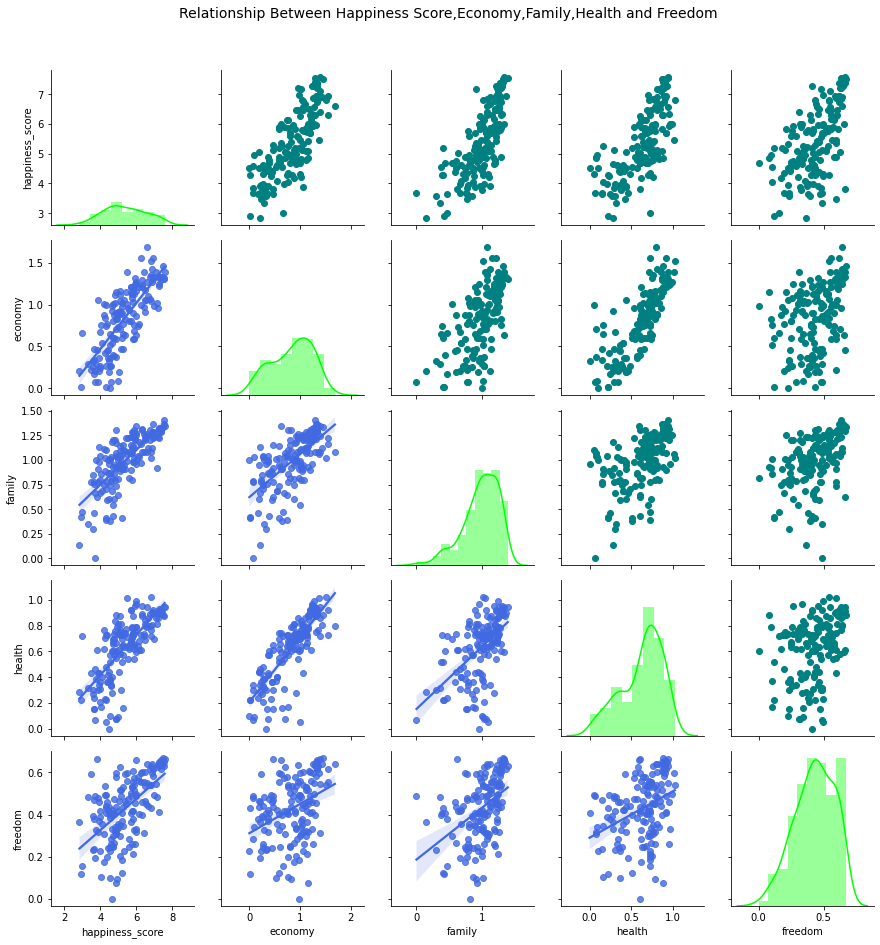

In [14]:
n=sns.PairGrid(df,x_vars=['happiness_score','economy','family','health','freedom'],y_vars=['happiness_score','economy','family','health','freedom'])
n.map_upper(plt.scatter,color='teal')
n.map_diag(sns.distplot,color='lime')
n.map_lower(sns.regplot,color ='royalblue')
plt.suptitle('Relationship Between Happiness Score,Economy,Family,Health and Freedom',y=1.05,fontsize=14)
plt.show()

Let's visualize relationship between happiness_score,trust,generosity,

In [17]:
fig = px.scatter_3d(data_frame=df,x='trust',y='generosity',z='dystopia_residual',color='happiness_score',color_continuous_scale='oranges')
fig.update_layout(
    title={
        'text':'Relationship Between Happiness Score, Trust, Generosity And Dystopia Residual',
        'y':0.92,
        'x':0.5,
        'xanchor':'center',
        'yanchor':'top'})

## 5.Predicting Happiness Score

We will implement several machine learning algorithms to predict happiness score

In [18]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import metrics
import xgboost as xgb

### 5.1. Encoding Categorical Variables

* Country
* Region

In [19]:
le1 =LabelEncoder()
le1.fit(df['country'])
df['country'] = le1.transform(df['country'])

In [20]:
le2 =LabelEncoder()
le2.fit(df['region'])
df['region'] = le2.transform(df['region'])

### 5.2. Splitting the Data

We will split the data into train and test data.Here dependent variable is happiness score and the independent variables are country,region,family,health,trust,freedom,generosity and dystopia residual. 

In [23]:
X=df[['country','region','economy','family','health','freedom','trust','generosity','dystopia_residual']]
y=df['happiness_score']

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

### 5.3. Linear Regression

In [27]:
lr=LinearRegression()
lr.fit(X,y)
predictions_lr=lr.predict(X_test)

In [28]:
print('MAE_Linear Regression=',metrics.mean_absolute_error(y_test,predictions_lr))
print('MSE_Linear Regression=',metrics.mean_squared_error(y_test,predictions_lr))
print('RMSE_Linear Regression=',np.sqrt(metrics.mean_squared_error(y_test,predictions_lr)))
print('MAPE_Linear Regression=',100*metrics.mean_absolute_error(y_test,predictions_lr)/df['happiness_score'].mean())
print('R2 Score_Linear Regression=',metrics.r2_score(y_test,predictions_lr))

MAE_Linear Regression= 0.0002641829926508706
MSE_Linear Regression= 8.733475812689455e-08
RMSE_Linear Regression= 0.0002955245474184751
MAPE_Linear Regression= 0.004914361163366271
R2 Score_Linear Regression= 0.9999999108593665


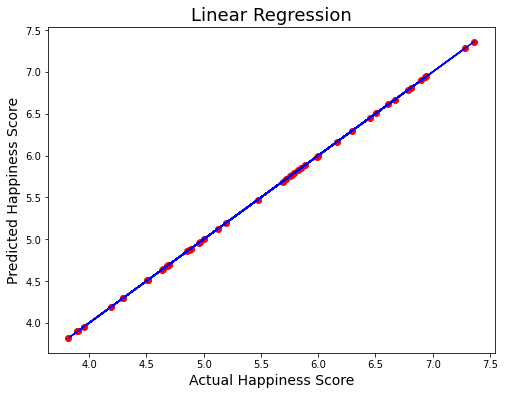

In [30]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=predictions_lr,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Happiness Score',fontsize=14)
plt.ylabel('Predicted Happiness Score',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

### 5.4. Decision Tree Regression

In [31]:
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
predictions_dtr = dtr.predict(X_test)

In [32]:
print('MAE_Decision Tree Regression=',metrics.mean_absolute_error(y_test,predictions_dtr))
print('MSE_Decision Tree Regression=',metrics.mean_squared_error(y_test,predictions_dtr))
print('RMSE_Decision Tree Regression=',np.sqrt(metrics.mean_squared_error(y_test,predictions_dtr)))
print('MAPE_Decision Tree Regression=',100*metrics.mean_absolute_error(y_test,predictions_dtr)/df['happiness_score'].mean())
print('R2 Score_Decision Tree Regression=',metrics.r2_score(y_test,predictions_dtr))

MAE_Decision Tree Regression= 0.4180416666666666
MSE_Decision Tree Regression= 0.29534462499999986
RMSE_Decision Tree Regression= 0.5434561849864255
MAPE_Decision Tree Regression= 7.776457184927739
R2 Score_Decision Tree Regression= 0.698548349620697


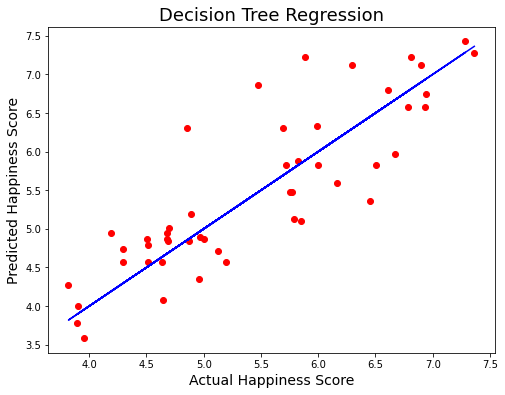

In [33]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=predictions_dtr,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Happiness Score',fontsize=14)
plt.ylabel('Predicted Happiness Score',fontsize=14)
plt.title('Decision Tree Regression',fontsize=18)
plt.show()

### 5.5. Random Forest Regression

In [34]:
rf=RandomForestRegressor(n_estimators=200)
rf.fit(X_train,y_train)
predictions_rf=rf.predict(X_test)

In [35]:
print('MAE_Random Forest Regression=', metrics.mean_absolute_error(y_test,predictions_rf))
print('MSE_Random Forest Regression=', metrics.mean_squared_error(y_test,predictions_rf))
print('RMSE_Random Forest Regression=', np.sqrt(metrics.mean_squared_error(y_test,predictions_rf)))
print('MAPE_Random Forest Regression=', 100*metrics.mean_absolute_error(y_test,predictions_rf)/df['happiness_score'].mean())
print('R2 Score_Random Forest Regression=',metrics.r2_score(y_test,predictions_rf))

MAE_Random Forest Regression= 0.22181656249999948
MSE_Random Forest Regression= 0.07796230943489552
RMSE_Random Forest Regression= 0.27921731578628056
MAPE_Random Forest Regression= 4.126256157533963
R2 Score_Random Forest Regression= 0.9204256151723392


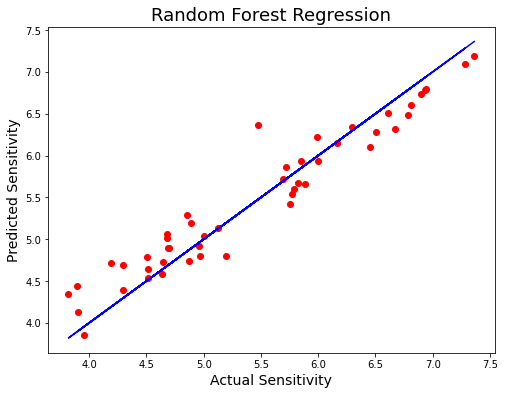

In [37]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=predictions_rf, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Sensitivity',fontsize=14)
plt.ylabel('Predicted Sensitivity',fontsize=14)
plt.title('Random Forest Regression' ,fontsize=18)
plt.show()

### 5.6. Support Vector Regression

In [38]:
svr =SVR(gamma='auto')
svr.fit(X_train,y_train)
predictions_svr = svr.predict(X_test)

In [39]:
print('MAE_Support Vector Regression=', metrics.mean_absolute_error(y_test,predictions_svr))
print('MSE_Support Vector Regression=', metrics.mean_squared_error(y_test,predictions_svr))
print('RMSE_Support Vector Regression=', np.sqrt(metrics.mean_squared_error(y_test,predictions_svr)))
print('MAPE_Support Vector Regression=', 100*metrics.mean_absolute_error(y_test,predictions_svr)/df['happiness_score'].mean())
print('R2 Score_Support Vector Regression=',metrics.r2_score(y_test,predictions_svr))

MAE_Support Vector Regression= 0.9214359390615652
MSE_Support Vector Regression= 1.1688776200960749
RMSE_Support Vector Regression= 1.0811464378594025
MAPE_Support Vector Regression= 17.14065295428912
R2 Score_Support Vector Regression= -0.19304723310740424


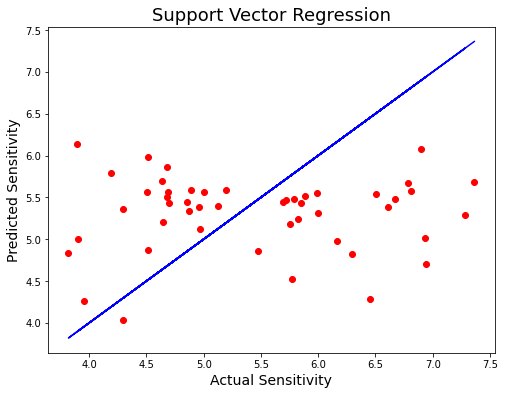

In [41]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=predictions_svr, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Sensitivity',fontsize=14)
plt.ylabel('Predicted Sensitivity',fontsize=14)
plt.title('Support Vector Regression',fontsize=18)
plt.show()

### 5.7. XGBoost Regression

In [42]:
xgbr = xgb.XGBRegressor(n_estimators=100,learning_rate=0.08,gamma=0,subsample=0.75,colsample_bytree=1,max_depth=7)
xgbr.fit(X_train,y_train)
predictions_xgbr = xgbr.predict(X_test)

In [43]:
print('MAE_XGBoost Regression=', metrics.mean_absolute_error(y_test,predictions_xgbr))
print('MSE_XGBoost Regression=', metrics.mean_squared_error(y_test,predictions_xgbr))
print('RMSE_XGBoost Regression=', np.sqrt(metrics.mean_squared_error(y_test,predictions_xgbr)))
print('MAPE_XGBoost Regression=', 100*metrics.mean_absolute_error(y_test,predictions_xgbr)/df['happiness_score'].mean())
print('R2 Score_XGBoost Regression=',metrics.r2_score(y_test,predictions_xgbr))

MAE_XGBoost Regression= 0.1719866520563761
MSE_XGBoost Regression= 0.058579036958218866
RMSE_XGBoost Regression= 0.24203106610147976
MAPE_XGBoost Regression= 3.1993146682239963
R2 Score_XGBoost Regression= 0.9402096876871036


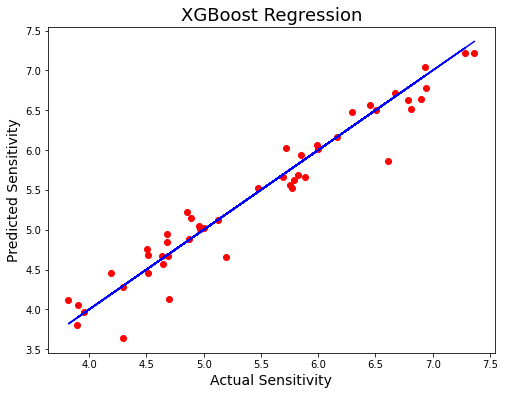

In [44]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=predictions_xgbr, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Sensitivity',fontsize=14)
plt.ylabel('Predicted Sensitivity',fontsize=14)
plt.title('XGBoost Regression',fontsize=18)
plt.show()

So We conclude that Linear Regression with the R2 Score of 99.99% is the best model for predictig the happiness score accross the world

## 6. Conclusion

* We perfomred Exploratory Data Analysis and visualized the impacts of various features on hapiness score throughout the world.

* Linear Regression algorithm with R2 score of 99.99% was the best model for predicting happiness score across the world